In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Absolute path to your file
file_path = 'C:/Users/RUDRAJA/Desktop/BCG/powerco_clean.csv'

# Load the data into a DataFrame
df = pd.read_csv(file_path)



In [3]:

# Display the first few rows of the DataFrame
df.head()



,id,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_activ,months_to_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,...,31,5,2,6,0,0,1,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,...,77,8,77,4,1,0,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,...,69,3,69,8,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,...,70,2,70,9,0,0,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,...,72,2,72,9,1,0,0,0,0,0


In [4]:
df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'forecast_cons_12m',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_price_off_peak',
       'var_6m_price_peak', 'var_6m_price_mid_peak', 'churn',
       'avg_offpeak_vs_peak_diff', 'off_peak_peak_var_mean_di

In [5]:

# Check for missing values
print(df.isnull().sum())



id                                            0
cons_12m                                      0
cons_gas_12m                                  0
forecast_cons_12m                             0
forecast_discount_energy                      0
                                             ..
channel_ewpakwlliwisiwduibdlfmalxowmwpci      0
channel_foosdfpfkusacimwkcsosbicdxkicaua      0
channel_lmkebamcaaclubfxadlmueccxoimlema      0
channel_usilxuppasemubllopkaafesmlibmsdf      0
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0
Length: 64, dtype: int64


In [6]:
# Separate features and target variable
X = df.drop(columns=['churn', 'id'])
y = df['churn']


In [7]:
# Check for infinite and NaN values
print("Infinite values in X:", np.any(np.isinf(X)))
print("NaN values in X:", np.any(np.isnan(X)))

# Handle infinite and NaN values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

# Verify data after cleaning
print("Infinite values in X after cleaning:", np.any(np.isinf(X)))
print("NaN values in X after cleaning:", np.any(np.isnan(X)))


Infinite values in X: True
NaN values in X: True
Infinite values in X after cleaning: False
NaN values in X after cleaning: False


(10224, 62)
(10224,)
(4382, 62)
(4382,)
Model trained successfully.
True positives: 19
False positives: 11
True negatives: 3931
False negatives: 421

Accuracy: 0.9014148790506618
Precision: 0.6333333333333333
Recall: 0.04318181818181818
Feature Importance Ranking:
                                     features  importance
0                                   cons_12m    0.053148
1                    forecast_meter_rent_12m    0.050644
2                                 net_margin    0.049665
3                         margin_net_pow_ele    0.047541
4                          forecast_cons_12m    0.047410
..                                       ...         ...
57  channel_ewpakwlliwisiwduibdlfmalxowmwpci    0.002684
58                     var_6m_price_peak_fix    0.001974
59                 var_6m_price_mid_peak_fix    0.001911
60                  forecast_discount_energy    0.001229
61        peak_mid_peak_fix_max_monthly_diff    0.000926

[62 rows x 2 columns]


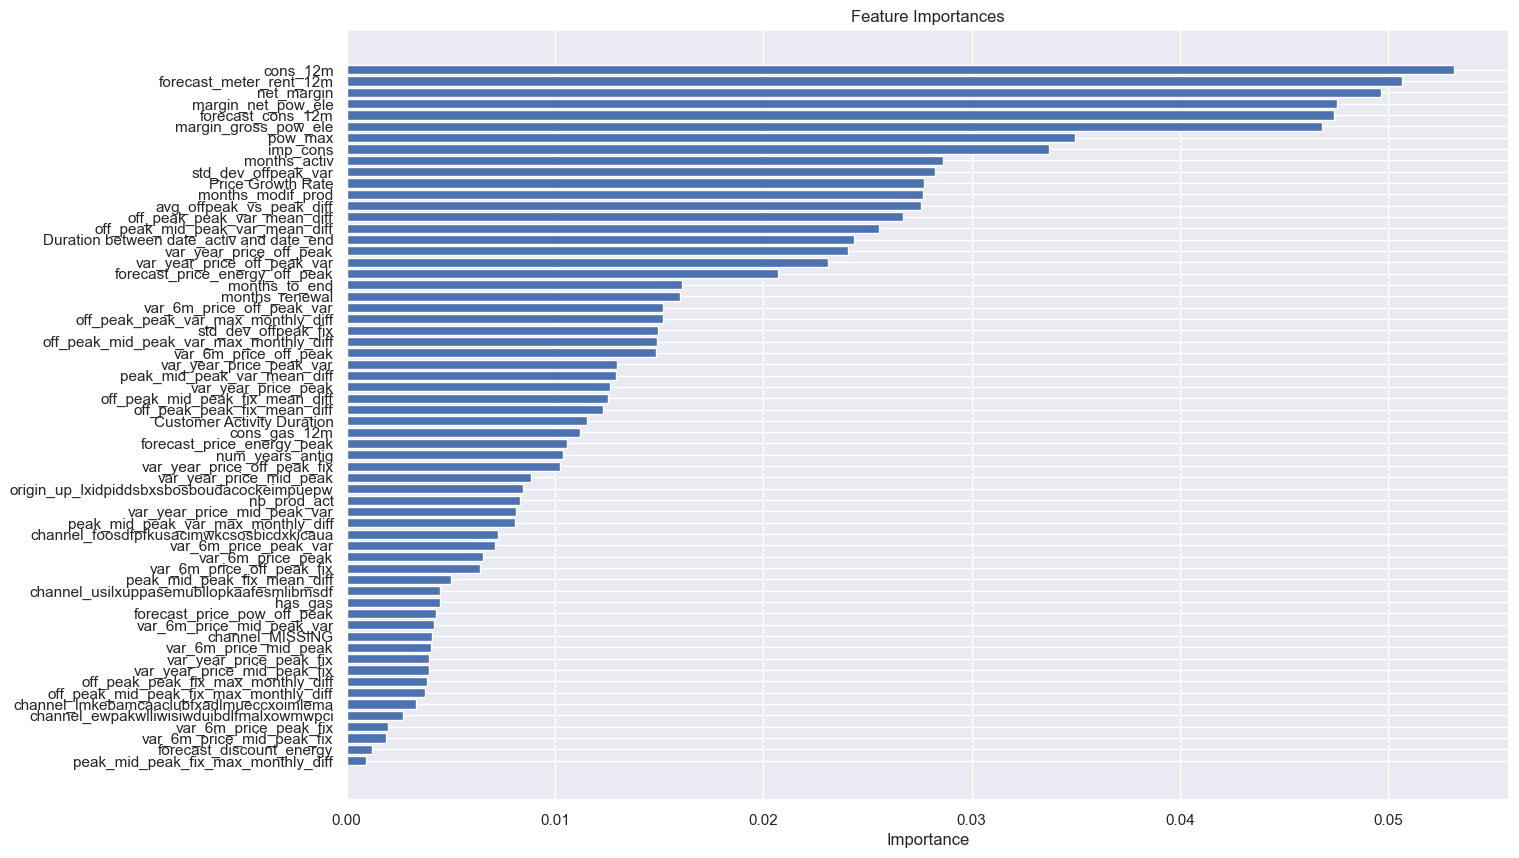

True positives with top features: 11
False positives with top features: 5
True negatives with top features: 3281
False negatives with top features: 355

Accuracy with top features: 0.9014238773274917
Precision with top features: 0.6875
Recall with top features: 0.030054644808743168


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Check the model's performance
print("Model trained successfully.")

# Make predictions
predictions = model.predict(X_test)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

# Calculate and print accuracy, precision, and recall
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision: {precision_score(y_test, predictions)}")
print(f"Recall: {recall_score(y_test, predictions)}")

# Feature importance
feature_importances = pd.DataFrame({
    'features': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

# Display the feature importance ranking
print("Feature Importance Ranking:\n", feature_importances)

# Plot feature importance
plt.figure(figsize=(15, 10))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

# Select the top features (you can define how many features to keep)
top_features = feature_importances['features'][:8]  # Adjust the number as needed

# Subset the DataFrame with the top features
X_top_features = X[top_features]

# Split the data again with top features
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_features, y, test_size=0.25, random_state=42)

# Train the model again with the top features
model_top_features = RandomForestClassifier(n_estimators=1000, random_state=42)
model_top_features.fit(X_train_top, y_train_top)

# Make predictions
predictions_top = model_top_features.predict(X_test_top)

# Evaluate the model
tn_top, fp_top, fn_top, tp_top = confusion_matrix(y_test_top, predictions_top).ravel()
print(f"True positives with top features: {tp_top}")
print(f"False positives with top features: {fp_top}")
print(f"True negatives with top features: {tn_top}")
print(f"False negatives with top features: {fn_top}\n")
print(f"Accuracy with top features: {accuracy_score(y_test_top, predictions_top)}")
print(f"Precision with top features: {precision_score(y_test_top, predictions_top)}")
print(f"Recall with top features: {recall_score(y_test_top, predictions_top)}")


(10224, 10)
(10224,)
(4382, 10)
(4382,)
Model trained successfully.
True positives: 14
False positives: 2
True negatives: 3940
False negatives: 426

Accuracy: 0.9023277042446372
Precision: 0.875
Recall: 0.031818181818181815
Feature Importance Ranking:
                   features  importance
0                 cons_12m    0.124205
1               net_margin    0.117784
2  forecast_meter_rent_12m    0.117746
3      std_dev_offpeak_var    0.116130
4        forecast_cons_12m    0.110807
5             months_activ    0.092946
6       margin_net_pow_ele    0.086222
7     margin_gross_pow_ele    0.085477
8                 imp_cons    0.075157
9                  pow_max    0.073527


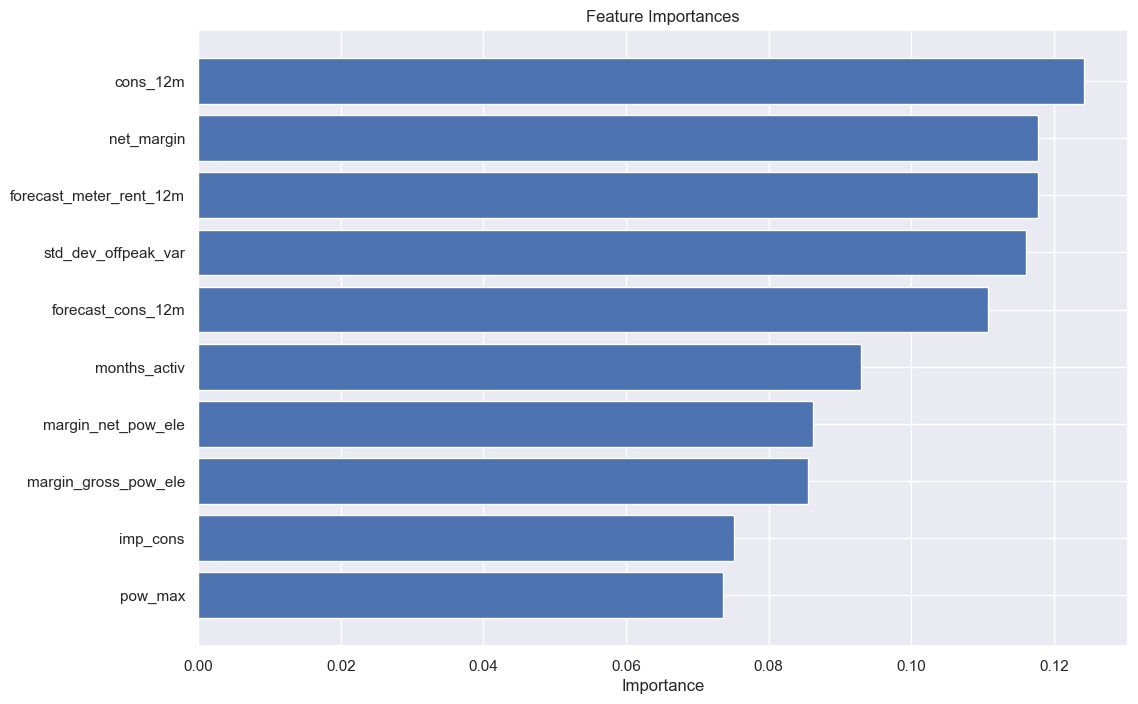

In [10]:
# Define the selected features
selected_features = [
    'cons_12m', 'net_margin', 'forecast_meter_rent_12m', 
    'forecast_cons_12m', 'margin_net_pow_ele', 'margin_gross_pow_ele', 
    'pow_max', 'imp_cons', 'std_dev_offpeak_var', 'months_activ'
]

# Subset the DataFrame with the selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Check the model's performance
print("Model trained successfully.")

# Make predictions
predictions = model.predict(X_test)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

# Calculate and print accuracy, precision, and recall
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision: {precision_score(y_test, predictions)}")
print(f"Recall: {recall_score(y_test, predictions)}")

# Feature importance
feature_importances = pd.DataFrame({
    'features': selected_features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

# Display the feature importance ranking
print("Feature Importance Ranking:\n", feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


(10224, 17)
(10224,)
(4382, 17)
(4382,)
Model trained successfully.
True positives: 21
False positives: 7
True negatives: 3935
False negatives: 419

Accuracy: 0.9027841168416249
Precision: 0.75
Recall: 0.04772727272727273
Feature Importance Ranking:
                                     features  importance
0                                   cons_12m    0.091065
1                    forecast_meter_rent_12m    0.088634
2                                 net_margin    0.086640
3                          forecast_cons_12m    0.081863
4                        std_dev_offpeak_var    0.074485
5                          Price Growth Rate    0.073154
6                         margin_net_pow_ele    0.070946
7                       margin_gross_pow_ele    0.069908
8                                    pow_max    0.060956
9                                   imp_cons    0.056458
10                         months_modif_prod    0.049262
11                              months_activ    0.040055
12      

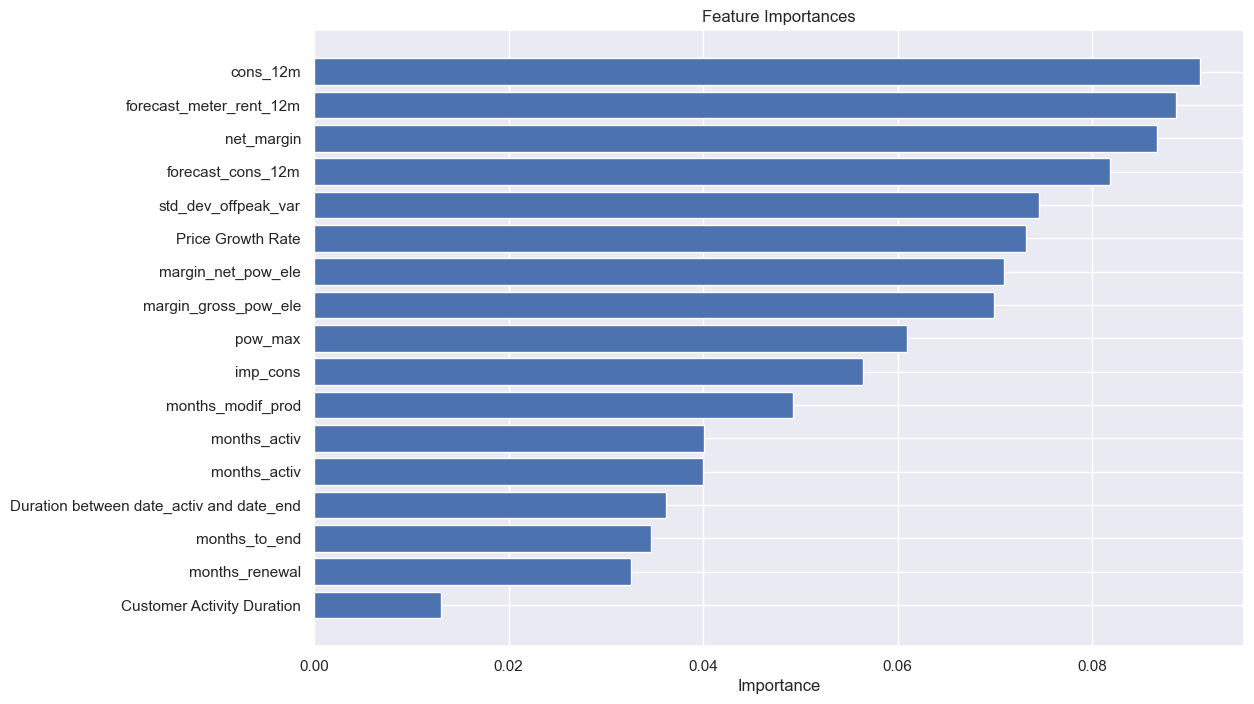

In [11]:

# Define the selected features
selected_features = [
    'cons_12m', 'net_margin', 'forecast_meter_rent_12m', 
    'forecast_cons_12m', 'margin_net_pow_ele', 'margin_gross_pow_ele', 
    'pow_max', 'imp_cons', 'std_dev_offpeak_var', 'months_activ',
    'Price Growth Rate',
       'Customer Activity Duration',
       'Duration between date_activ and date_end', 'months_activ',
       'months_to_end', 'months_modif_prod', 'months_renewal',
]

# Subset the DataFrame with the selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Check the model's performance
print("Model trained successfully.")

# Make predictions
predictions = model.predict(X_test)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

# Calculate and print accuracy, precision, and recall
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision: {precision_score(y_test, predictions)}")
print(f"Recall: {recall_score(y_test, predictions)}")

# Feature importance
feature_importances = pd.DataFrame({
    'features': selected_features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

# Display the feature importance ranking
print("Feature Importance Ranking:\n", feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


(10224, 11)
(10224,)
(4382, 11)
(4382,)
Model trained successfully.
True positives: 15
False positives: 4
True negatives: 3938
False negatives: 425

Accuracy: 0.9020994979461433
Precision: 0.7894736842105263
Recall: 0.03409090909090909
Feature Importance Ranking:
                    features  importance
0                  cons_12m    0.111910
1   forecast_meter_rent_12m    0.107825
2                net_margin    0.105290
3         forecast_cons_12m    0.100453
4       std_dev_offpeak_var    0.097110
5         Price Growth Rate    0.094495
6              months_activ    0.084015
7        margin_net_pow_ele    0.081221
8      margin_gross_pow_ele    0.080893
9                  imp_cons    0.068507
10                  pow_max    0.068280


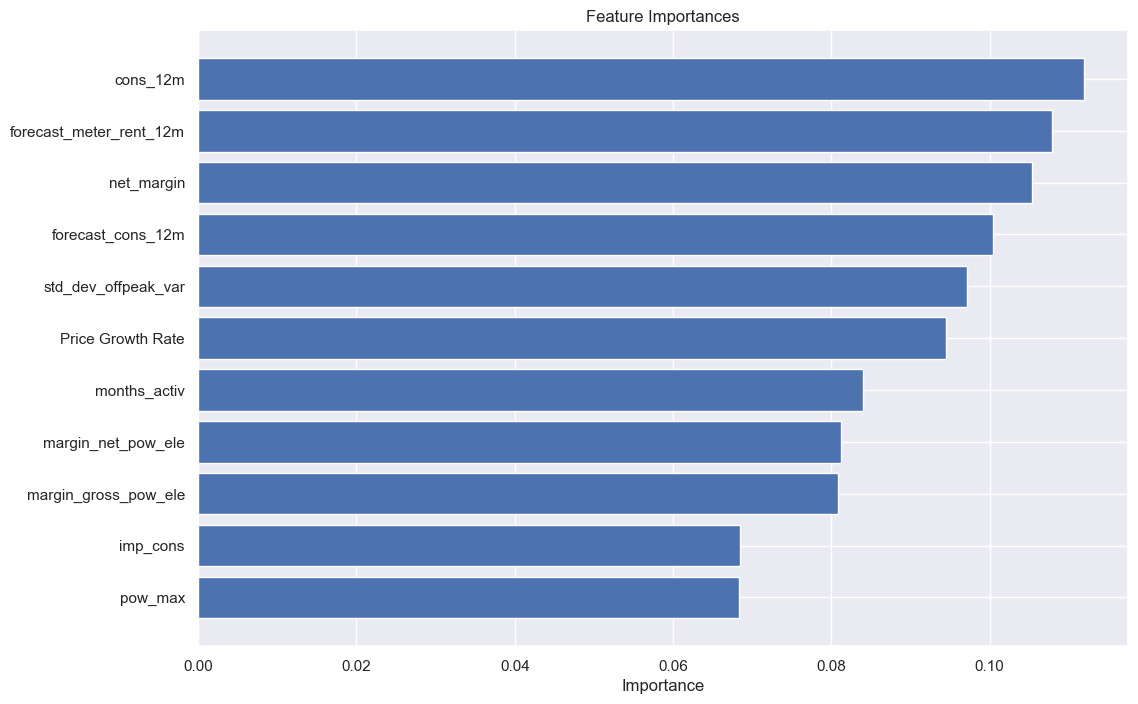

In [12]:

# Define the selected features
selected_features = [
    'cons_12m', 'net_margin', 'forecast_meter_rent_12m', 
    'forecast_cons_12m', 'margin_net_pow_ele', 'margin_gross_pow_ele', 
    'pow_max', 'imp_cons', 'std_dev_offpeak_var', 'months_activ',
    'Price Growth Rate'
]

# Subset the DataFrame with the selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Check the model's performance
print("Model trained successfully.")

# Make predictions
predictions = model.predict(X_test)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

# Calculate and print accuracy, precision, and recall
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision: {precision_score(y_test, predictions)}")
print(f"Recall: {recall_score(y_test, predictions)}")

# Feature importance
feature_importances = pd.DataFrame({
    'features': selected_features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

# Display the feature importance ranking
print("Feature Importance Ranking:\n", feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


(10224, 16)
(10224,)
(4382, 16)
(4382,)
Model trained successfully.
True positives: 20
False positives: 7
True negatives: 3935
False negatives: 420

Accuracy: 0.902555910543131
Precision: 0.7407407407407407
Recall: 0.045454545454545456
Feature Importance Ranking:
                                     features  importance
0                                   cons_12m    0.093988
1                    forecast_meter_rent_12m    0.090862
2                                 net_margin    0.088063
3                          forecast_cons_12m    0.083659
4                        std_dev_offpeak_var    0.076845
5                          Price Growth Rate    0.075689
6                         margin_net_pow_ele    0.071839
7                       margin_gross_pow_ele    0.070712
8                                    pow_max    0.062102
9                                   imp_cons    0.057620
10                         months_modif_prod    0.052980
11                              months_activ    0.0

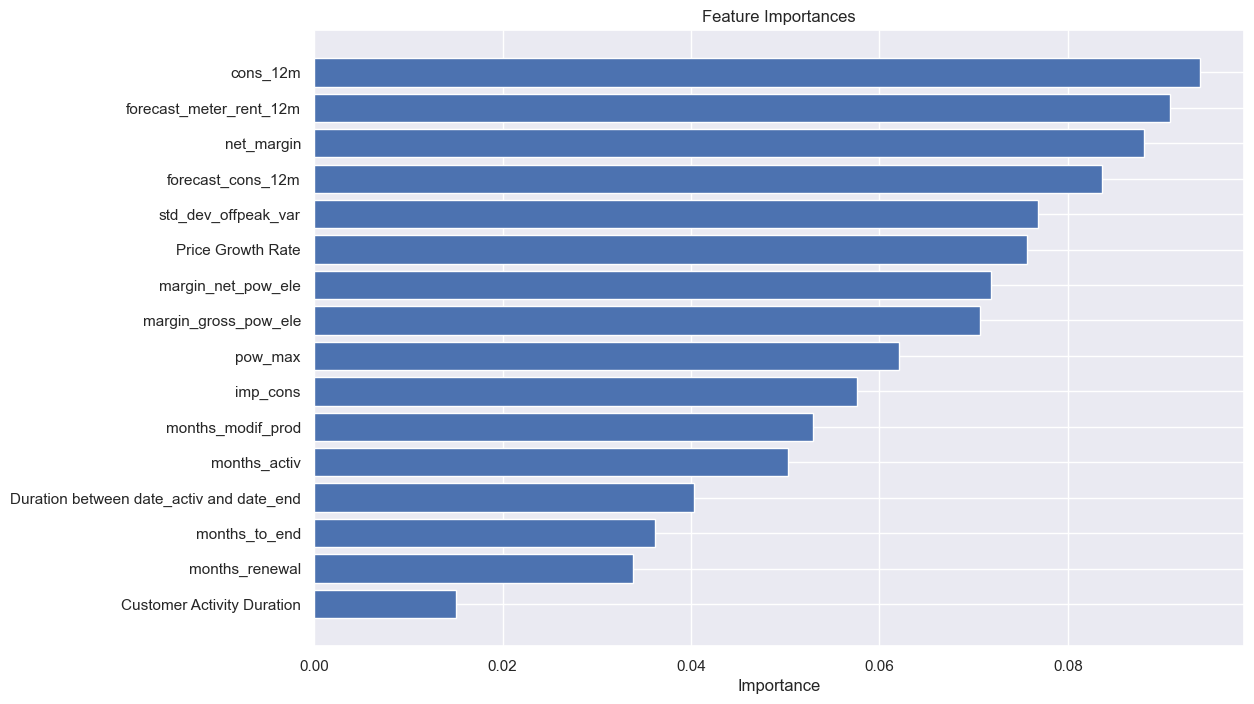

In [31]:

selected_features = [
    'cons_12m', 'net_margin', 'forecast_meter_rent_12m', 
    'forecast_cons_12m', 'margin_net_pow_ele', 'margin_gross_pow_ele', 
    'pow_max', 'imp_cons', 'std_dev_offpeak_var', 'months_activ',
    'Price Growth Rate', 'Customer Activity Duration',
    'Duration between date_activ and date_end', 'months_to_end', 
    'months_modif_prod', 'months_renewal'
]


# Subset the DataFrame with the selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Check the model's performance
print("Model trained successfully.")

# Make predictions
predictions = model.predict(X_test)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

# Calculate and print accuracy, precision, and recall
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision: {precision_score(y_test, predictions)}")
print(f"Recall: {recall_score(y_test, predictions)}")

# Feature importance
feature_importances = pd.DataFrame({
    'features': selected_features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

# Display the feature importance ranking
print("Feature Importance Ranking:\n", feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()
